** 2.2 迷路内をランダムに探索させる **
    

# 使用するパッケージの宣言

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 初期位置での迷路の様子

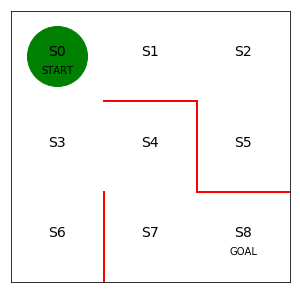

In [30]:
# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)

plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

## オブジェクト指向でmatplotlibを使った場合

### 図を描く大きさと、図の変数名を宣言

#### 方法１

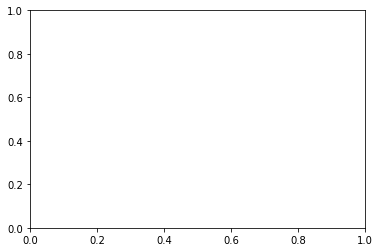

In [157]:
fig, ax = plt.subplots()

#### 方法２

In [158]:
fig = plt.figure(figsize=(5, 5))

In [159]:
ax = fig.add_subplot("111")

ax = plt.gca()

### 赤い壁を描く

In [160]:
ax.plot([1, 1], [0, 1], color='red', linewidth=2)

ax.plot([1, 2], [2, 2], color='red', linewidth=2)

ax.plot([2, 2], [2, 1], color='red', linewidth=2)
ax.plot([2, 3], [1, 1], color='red', linewidth=2)

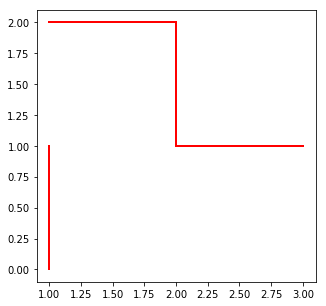

In [161]:
fig

### 状態を示す文字S0～S8を描く

In [163]:
ax.text(0.5, 2.5, 'S0', size=14, ha='center')
ax.text(1.5, 2.5, 'S1', size=14, ha='center')
ax.text(2.5, 2.5, 'S2', size=14, ha='center')
ax.text(0.5, 1.5, 'S3', size=14, ha='center')
ax.text(1.5, 1.5, 'S4', size=14, ha='center')
ax.text(2.5, 1.5, 'S5', size=14, ha='center')
ax.text(0.5, 0.5, 'S6', size=14, ha='center')
ax.text(1.5, 0.5, 'S7', size=14, ha='center')
ax.text(2.5, 0.5, 'S8', size=14, ha='center')
ax.text(0.5, 2.3, 'START', ha='center')
ax.text(2.5, 0.3, 'GOAL', ha='center')

Text(2.5,0.3,'GOAL')

In [164]:
# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

(0, 3)

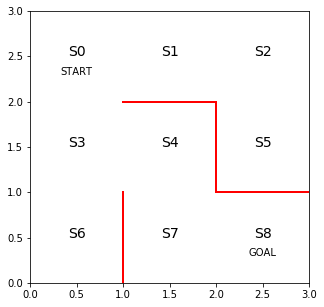

In [165]:
fig

In [166]:
ax.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

In [167]:
ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [168]:
# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

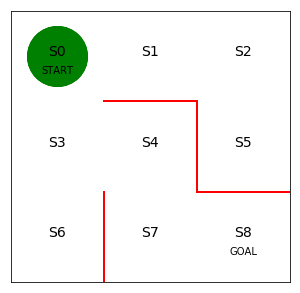

In [169]:
fig

# 初期の方策を決定するパラメータtheta_0を設定

行は状態0～7、列は移動方向で↑、→、↓、←を表す

In [170]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

# 方策パラメータthetaを行動方策piに変換する関数の定義

np.nansum はRのsum( , na.rm = T)に相当

In [171]:
np.nansum?

In [172]:
np.nansum(theta_0[0,:])

2.0

In [173]:
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

# 初期の方策pi_0を求める

In [174]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

# 初期の方策pi_0を表示

In [175]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

# 1step移動後の状態sを求める関数を定義

In [176]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確率に従って、directionが選択される

    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next

## 1step後にどこにいくかは確率的に決定される

In [39]:
get_next_s(pi_0,0)

3

In [56]:
get_next_s(pi_0, get_next_s(pi_0, 0))

2

# 迷路内をエージェントがゴールするまで移動させる関数の定義

In [84]:
def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 記録リストに次の状態（エージェントの位置）を追加

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return state_history

## もう少し原始的なバージョンで概念確認

In [82]:
is_continue = True
s = 0
path71 = list()
while is_continue:
    path71.append(str(s))
    if s == 8:
        is_continue = False
    else:
        s = get_next_s(pi_0 , s)


print(" -> ".join(path71))

0 -> 3 -> 0 -> 1 -> 2 -> 5 -> 2 -> 5 -> 2 -> 5 -> 2 -> 5 -> 2 -> 5 -> 2 -> 1 -> 2 -> 1 -> 2 -> 5 -> 2 -> 1 -> 0 -> 1 -> 0 -> 3 -> 4 -> 3 -> 6 -> 3 -> 4 -> 7 -> 8


# 迷路内をゴールを目指して、移動

In [85]:
state_history = goal_maze(pi_0)

In [86]:
state_history

[0, 3, 4, 7, 8]

In [40]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")


[0, 3, 0, 3, 4, 3, 6, 3, 4, 3, 0, 1, 2, 1, 0, 3, 4, 3, 0, 3, 0, 3, 4, 7, 4, 3, 6, 3, 0, 1, 2, 1, 0, 3, 4, 7, 4, 7, 4, 7, 4, 7, 8]
迷路を解くのにかかったステップ数は42です


# エージェントの移動の様子を可視化します


参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

matplotlibの考え方については：
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

In [ ]:
from matplotlib import animation
from IPython.display import HTML

In [96]:
plt.show()

In [97]:
plt2 = plt

In [98]:
plt2.show()

In [87]:
def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)

In [45]:
animate(0)

(<matplotlib.lines.Line2D at 0x189590a8c88>,)

In [42]:
#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [156]:
%%bash
git commit -a -m "studying matplotlib object oriented usage"

[master 7774cd9] studying matplotlib object oriented usage
 2 files changed, 583 insertions(+), 103 deletions(-)


The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
